<h3>KNN</h3>
This notebook uses KNN classifier to predict/classify gout flare

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Load the dataset
data = pd.read_csv('../Data/processed_data.csv')
data['Flare'] = data['Flare'].replace(3,0)
# Loading p-values
p_values = pd.read_csv('../Data/p_value_data.csv')
# Filter the p-values to get significant genes
significant_genes = p_values[p_values['P_Flare'] < 0.05]['GeneID'].tolist()

# Filter the dataset to keep only significant genes column names and flare
X = data[significant_genes]
y = data['Flare']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model =KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.45714285714285713
              precision    recall  f1-score   support

           0       0.47      0.44      0.46        18
           1       0.44      0.47      0.46        17

    accuracy                           0.46        35
   macro avg       0.46      0.46      0.46        35
weighted avg       0.46      0.46      0.46        35



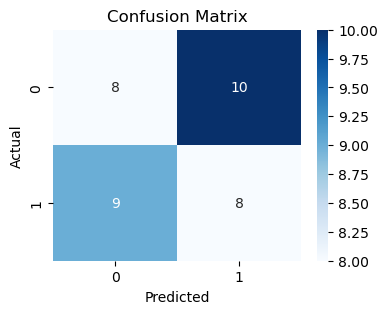

AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

In [ ]:
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Need to double check the labels of the cm
